# Model Evaluation steps :
## 1.Evaluate the model using metrics such as Mean Squared Error (MSE), R-squared.
## 2.Plot residuals to check the assumptions of linear regression.
## 3.Compare model performance with different feature sets or preprocessing steps.
## 4.Script: scripts/evaluate_model.py

# Import library 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score ,mean_squared_error , mean_absolute_error ,r2_score

# load model from model_training.ipynb 

In [2]:
best_model = joblib.load("linear_regression_model.pkl")


# Load the test data

In [3]:

X_test = pd.read_pickle("X_test.pkl")  # Load test features
y_test = pd.read_pickle("y_test.pkl")# Load test targets
X_train = pd.read_pickle("X_train.pkl")
y_train = pd.read_pickle("y_train.pkl")

# Make predictions (assuming you have the X_test and y_test available)

In [4]:
y_pred = best_model.predict(X_test)

# Evaluate the model

In [5]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics

In [6]:
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 3.2429
Mean Squared Error (MSE): 20.6877
Root Mean Squared Error (RMSE): 4.5484
R-squared (R2): 0.7200


# Calculate residuals

In [7]:
residuals = y_test - y_pred

# Plot residuals vs predicted values

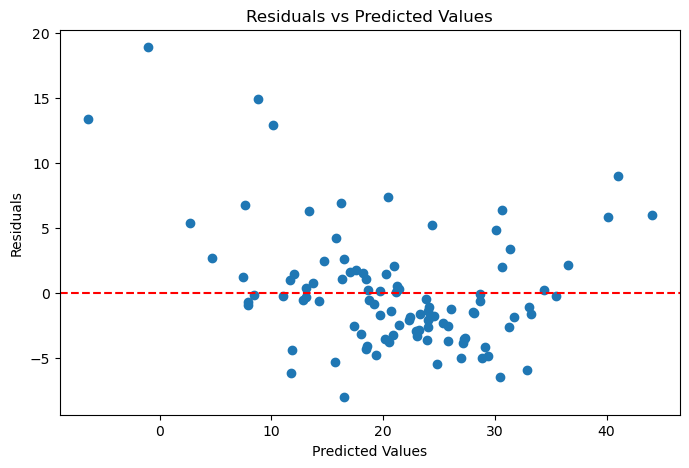

In [8]:

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at zero
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Optional: Plot histogram of residuals to check normality

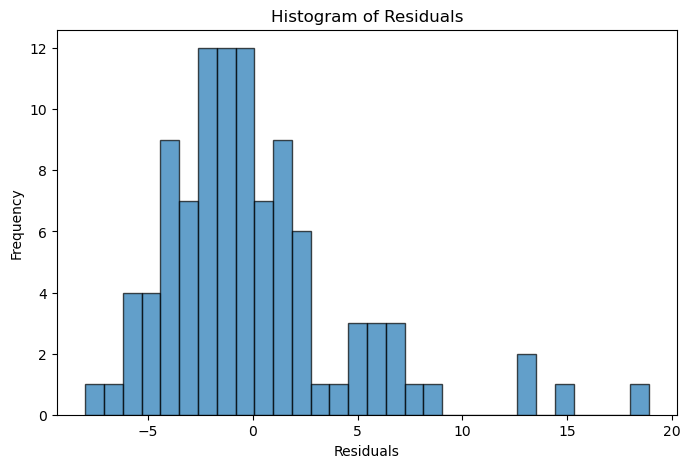

In [9]:

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Check column names in the data


In [10]:
# Define feature sets (make sure they match the columns in the dataset)
features_set_1 = ["rm", "lstat", "ptratio"]  # Adjust as needed based on actual columns
features_set_2 = ["crim", "zn", "age"]  # Adjust this based on actual columns in your dataset

# Initialize StandardScaler for preprocessing
scaler = StandardScaler()


In [11]:
# Compare performance for Feature Set 1 without scaling and with scaling

In [12]:

for features in [features_set_1, features_set_2]:
    # Check if features are valid columns in X_train
    if not set(features).issubset(X_train.columns):
        print(f"Warning: Some features in {features} are not present in the dataset.")
        continue
    
    # Select features
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]
    
    # Train without scaling
    best_model.fit(X_train_selected, y_train)
    y_pred_no_scaling = best_model.predict(X_test_selected)
    
    # Train with scaling
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)
    best_model.fit(X_train_scaled, y_train)
    y_pred_scaled = best_model.predict(X_test_scaled)
    
    # Calculate and print performance metrics
    mae_no_scaling = mean_absolute_error(y_test, y_pred_no_scaling)
    mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
    mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
    mse_scaled = mean_squared_error(y_test, y_pred_scaled)
    rmse_no_scaling = np.sqrt(mse_no_scaling)
    rmse_scaled = np.sqrt(mse_scaled)
    r2_no_scaling = r2_score(y_test, y_pred_no_scaling)
    r2_scaled = r2_score(y_test, y_pred_scaled)
    
    # Print results
    print(f"Feature Set: {features}")
    print(f"Without Scaling: MAE = {mae_no_scaling:.4f}, MSE = {mse_no_scaling:.4f}, RMSE = {rmse_no_scaling:.4f}, R2 = {r2_no_scaling:.4f}")
    print(f"With Scaling: MAE = {mae_scaled:.4f}, MSE = {mse_scaled:.4f}, RMSE = {rmse_scaled:.4f}, R2 = {r2_scaled:.4f}")
    print("----")




    

Feature Set: ['rm', 'lstat', 'ptratio']
Without Scaling: MAE = 3.7831, MSE = 24.6019, RMSE = 4.9600, R2 = 0.6671
With Scaling: MAE = 3.7831, MSE = 24.6019, RMSE = 4.9600, R2 = 0.6671
----
Feature Set: ['crim', 'zn', 'age']
Without Scaling: MAE = 5.4672, MSE = 51.1772, RMSE = 7.1538, R2 = 0.3074
With Scaling: MAE = 5.4672, MSE = 51.1772, RMSE = 7.1538, R2 = 0.3074
----
